In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [2]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 9000

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [25]:
# crystal asymmetry angle
alphaAsym = 19.88*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = 2.8835
# distance between CRLs and focus
f2 = 3

# crystal reflection hkl index
hkl = [3,1,1]

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
crl0 = optics.CRL('crl0', z=830, roc=1700e-6, diameter=2e-3)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0,
                          alphaAsym=alphaAsym, orientation=0, pol='s', delta=10.e-6)

crystal2 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0, alphaAsym=alphaAsym,
                         orientation=0, pol='s', delta=0e-6)


# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal1.z+1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [crl0,im0,crystal1, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
x is focused
y is focused
b 8.07
b 8.07
after c1: 0.8685


In [56]:
for item in mono_beamline.full_list:
    print(item)
    
print(mono_beamline.full_list[5].dz*90.6)

print((np.arccos(np.cos(crystal1.alpha+10e-6) + b1.lambda0/crystal1.d*np.sin(crystal1.alphaAsym)) + 10e-6 - crystal1.beta0))

140.25893826731465
9.064333330568997e-05


In [37]:
print('crystal 1 incidence angle: {:.4f} degrees'.format(crystal1.alpha*180/np.pi))
print('crystal 1 exit angle: {:.4f} degrees'.format(crystal1.beta0*180/np.pi))

crystal 1 incidence angle: 44.7566 degrees
crystal 1 exit angle: 5.0066 degrees


### Propagation through monochromator at central photon energy

FWHM in x: 690.1172491474713 microns
FWHM in y: 690.1172491474713 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
crl0
zRx: 7.19e+05
zRy: 7.37e+01
focal length: 202.05
zx: 19749.062506
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 718887063567.65 microns
zRy: 73727191.59 microns
remaining distance: 40000000.00 microns
goal for zx: 19789062506.26 microns
current zx: 19749062506.26 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 19789.062506
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 19789.062506
zy: 240.000000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 718887063567.65 micr

<IPython.core.display.Javascript object>


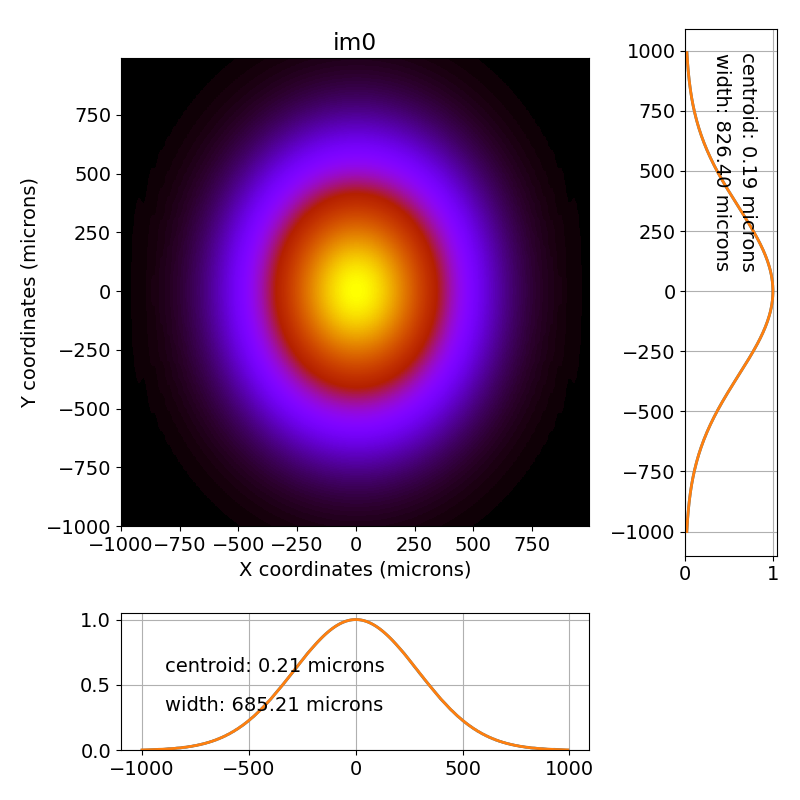

<IPython.core.display.Javascript object>


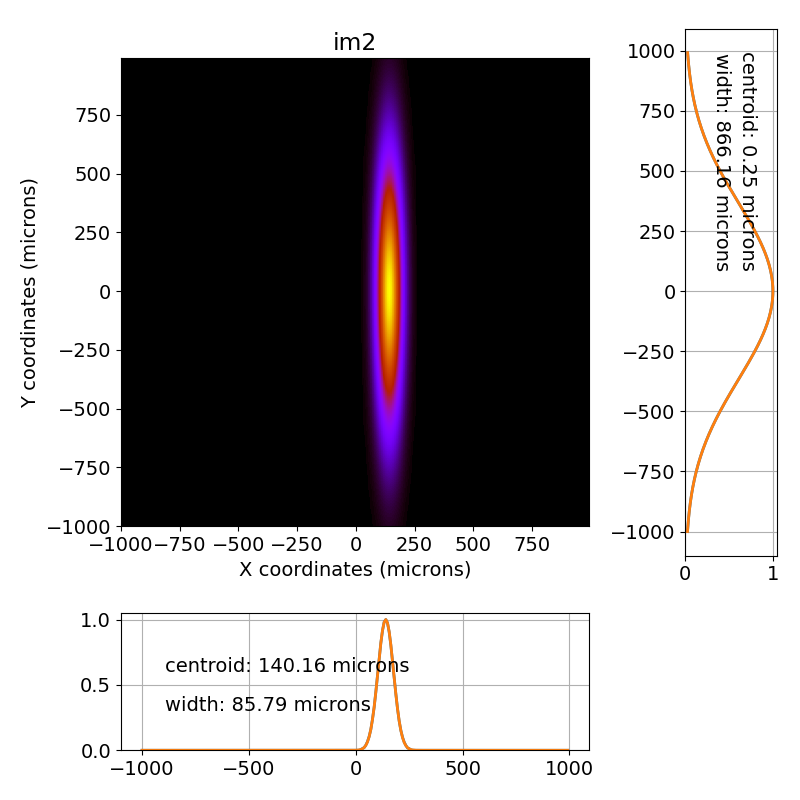

In [24]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im2.view_beam()